# Предобработка данных по фильмам и сериалам

In [106]:
import sys
sys.path.append('../')

import pandas as pd
from pathlib import Path
from tqdm import tqdm
import seaborn as sns

In [82]:
books_ds_path = Path('../datasets/kion/')

In [83]:
df_rating = pd.read_csv(books_ds_path / 'interactions.csv')
df_items = pd.read_csv(books_ds_path / 'items.csv')
df_users = pd.read_csv(books_ds_path / 'users.csv')

## Посмотрим на данные

In [84]:
df_rating

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0
...,...,...,...,...,...
5476246,648596,12225,2021-08-13,76,0.0
5476247,546862,9673,2021-04-13,2308,49.0
5476248,697262,15297,2021-08-20,18307,63.0
5476249,384202,16197,2021-04-19,6203,100.0


In [85]:
# Не так много итемов - уже хорошо, видимо не нужно чистить
df_items

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15958,6443,series,Полярный круг,Arctic Circle,2018.0,"драмы, триллеры, криминал","Финляндия, Германия",NaN,16.0,NaN,Ханну Салонен,"Иина Куустонен, Максимилиан Брюкнер, Пихла Вии...","Во время погони за браконьерами по лесу, сотру...","убийство, вирус, расследование преступления, н..."
15959,2367,series,Надежда,NaN,2020.0,"драмы, боевики",Россия,0.0,18.0,NaN,Елена Хазанова,"Виктория Исакова, Александр Кузьмин, Алексей М...",Оригинальный киносериал от создателей «Бывших»...,"Надежда, 2020, Россия"
15960,10632,series,Сговор,Hassel,2017.0,"драмы, триллеры, криминал",Россия,0.0,18.0,NaN,"Эшреф Рейбрук, Амир Камдин, Эрик Эгер","Ола Рапас, Алиетт Офейм, Уильма Лиден, Шанти Р...",Криминальная драма по мотивам романов о шведск...,"Сговор, 2017, Россия"
15961,4538,series,Среди камней,Darklands,2019.0,"драмы, спорт, криминал",Россия,0.0,18.0,NaN,"Марк О’Коннор, Конор МакМахон","Дэйн Уайт О’Хара, Томас Кэйн-Бирн, Джудит Родд...",Семнадцатилетний Дэмиен мечтает вырваться за п...,"Среди, камней, 2019, Россия"


In [86]:
# Зато много юзеров. Надеюсь разложение матрицы не будет сложным. Попробуем сократить
df_users

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0
...,...,...,...,...,...
840192,339025,age_65_inf,income_0_20,Ж,0
840193,983617,age_18_24,income_20_40,Ж,1
840194,251008,NaN,NaN,NaN,0
840195,590706,NaN,NaN,Ж,0


In [87]:
# Есть итемы с одним взаимодействием - точно под нож
sum(df_rating.item_id.value_counts() <= 10)

7531

In [88]:
# Есть такие для которых вообще нет взаимодействий
df_items[~df_items['item_id'].isin(df_rating.item_id.unique())]

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
5,854,film,Северо-Юг,NaN,2015.0,"драмы, русские",Россия,NaN,16.0,NaN,Юрий Грубник,"Алексей Воронин, Алексей Мурашов, Алена Алинин...",Авторский фильм молодого режиссера Юрия Грубни...,"Северо-Юг, 2015, Россия, бандиты, гангстеры, б..."
12,4778,film,Три лица,Three Faces,2018.0,"драмы, зарубежные, артхаус",Иран,NaN,18.0,NaN,Джафар Панахи,"Бехназ Джафари, Джафар Панахи, Маржие Резаэй, ...",Иранская кинозвезда Бехназ Джафари получает ви...,"Три, лица, 2018, Иран, знаменитости, мечта, ус..."
18,14921,film,Баллада о старом оружии,NaN,1986.0,"драмы, советские, военные",СССР,NaN,12.0,NaN,Геннадий Воронин,"Александр Демьяненко, Борис Чунаев, Валерий Ал...",Кавказская мать отправляется на фронт Великой ...,"Баллада, о, старом, оружии, 1986, СССР, армия,..."
108,6539,film,Как меня зовут,NaN,2014.0,"драмы, русские, артхаус",Россия,NaN,16.0,NaN,Нигина Сайфуллаева,"Александра Бортич, Анна Котова-Дерябина, Игорь...","Один из громких российских фильмов 2014 года, ...","Как, меня, зовут, 2014, Россия, запретная, люб..."
127,2244,film,Невеста монстра,Bride of the Monster,1955.0,"фантастика, зарубежные, ужасы",США,NaN,12.0,NaN,Эдвард Д. Вуд мл.,"Бад Осборн, Бела Лугоши, Бен Фроммер, Джон Уор...",Нетленные традиции фантастических фильмов ужас...,"Невеста, монстра, 1955, США, безумные, учёные,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15715,9741,film,Сахар,Sugar,2008.0,"драмы, фильмы hbo",США,NaN,0.0,HBO,"Анна Боден, Райан Флек","Анна Боден, Райан Флек",История о молодом и талантливом бейсболисте из...,"Сахар, 2008, США"
15819,4966,film,Сопротивление,Resistance,2020.0,"драмы, биография, военные, историческое","Великобритания, Франция, Германия, США",NaN,18.0,NaN,Хонатан Якубович,"Джесси Айзенберг, Клеманс Поэзи, Феликс Моати,...",После оккупации Франции нацистами начинающий м...,"2020, соединенное королевство, франция, герман..."
15841,7536,film,Свобода: Мать изгнанников,Liberty: Mother of Exiles,2019.0,документальное,США,NaN,16.0,HBO,"Рэнди Барбато, Фентон Бэйли",Дэвид Копперфилд,Статую свободы ежегодно посещает более четырех...,"Свобода, Мать, изгнанников, 2019, США"
15907,12939,film,Дети против Волшебников,NaN,2016.0,"фэнтези, семейное, русские, для детей",Россия,NaN,12.0,NaN,NaN,"Александр Кудринский, Виктор Овсянников, Влад ...",Основное действие мультфильма разворачивается ...,"Дети, против, Волшебников, 2016, Россия, друзь..."


## Почистим транзакционные данные

In [89]:
# 1. Выкинем ложные интеракции - посмотрел меньще 10% контента
df_rating = df_rating[df_rating.watched_pct > 10]

In [90]:
df_rating

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0
5,1032142,6686,2021-05-13,11286,100.0
...,...,...,...,...,...
5476244,438585,7829,2021-08-02,6804,100.0
5476247,546862,9673,2021-04-13,2308,49.0
5476248,697262,15297,2021-08-20,18307,63.0
5476249,384202,16197,2021-04-19,6203,100.0


In [91]:
# Выкинем непопулярные фильмы (<5 взаимодействий).
# Конечно будут потеряны какие-то [хорошие] артхаусные фильмы (мама! Аронофски, например), но это сильно уменьшит матрицу item-user

treshold = 5
item_id = df_rating['item_id'].value_counts()[(df_rating['item_id'].value_counts() > treshold)].index
df_rating = df_rating[df_rating['item_id'].isin(item_id)]
df_items = df_items[df_items['item_id'].isin(item_id)]

In [92]:
df_rating

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0
5,1032142,6686,2021-05-13,11286,100.0
...,...,...,...,...,...
5476244,438585,7829,2021-08-02,6804,100.0
5476247,546862,9673,2021-04-13,2308,49.0
5476248,697262,15297,2021-08-20,18307,63.0
5476249,384202,16197,2021-04-19,6203,100.0


In [93]:
df_items

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
7,11114,film,Принцесса Лебедь: Пират или принцесса,"The Swan Princess: Princess Tomorrow, Pirate T...",2016.0,"для детей, сказки, полнометражные, зарубежные,...",США,NaN,6.0,Sony Pictures,Ричард Рич,"Брайан Ниссен, Гарднер Джаэс, Грант Дураззо, Д...",Анимационная сказка о непоседливой принцессе Э...,"Принцесса, Лебедь, Пират, или, принцесса, 2016..."
8,9853,film,Лабиринты прошлого,Todos lo saben,2018.0,"криминал, детективы, драмы, зарубежные, триллеры",Испания,NaN,16.0,NaN,Асгар Фархади,"Барбара Ленни, Инма Куэста, Карла Кампра, Пене...","Испанка Лаура, давно переехавшая в Буэнос-Айре...","Лабиринты, прошлого, 2018, Испания, семейные, ..."
10,3526,film,Код «Красный»,Red Joan,2018.0,"биография, экранизации, драмы, зарубежные, мел...",Великобритания,NaN,18.0,NaN,Тревор Нанн,"Бен Майлз, Джуди Денч, Лоуренс Спэллман, Софи ...",Тихая английская пенсионерка Джоан попадает по...,"Код, Красный, 2018, Великобритания, друзья, лю..."
15,15076,film,Бладфест,Blood Fest,2018.0,"зарубежные, ужасы, комедии",США,NaN,18.0,NaN,Оуэн Эгертон,"Барбара Дункельман, Джейкоб Баталон, Крис Дабе...",Фанат хорорров Дакс вместе с друзьями отправля...,"Бладфест, 2018, США, друзья, заговоры, страхи,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15957,15610,series,Цена любви,Tsena Lubvi,2015.0,мелодрамы,Россия,NaN,16.0,NaN,А. Хван,"Анна Невская, Юрий Батурин, Анастасия Матвеева...",Преподаватель университета Елена однажды пришл...,NaN
15958,6443,series,Полярный круг,Arctic Circle,2018.0,"драмы, триллеры, криминал","Финляндия, Германия",NaN,16.0,NaN,Ханну Салонен,"Иина Куустонен, Максимилиан Брюкнер, Пихла Вии...","Во время погони за браконьерами по лесу, сотру...","убийство, вирус, расследование преступления, н..."
15959,2367,series,Надежда,NaN,2020.0,"драмы, боевики",Россия,0.0,18.0,NaN,Елена Хазанова,"Виктория Исакова, Александр Кузьмин, Алексей М...",Оригинальный киносериал от создателей «Бывших»...,"Надежда, 2020, Россия"
15960,10632,series,Сговор,Hassel,2017.0,"драмы, триллеры, криминал",Россия,0.0,18.0,NaN,"Эшреф Рейбрук, Амир Камдин, Эрик Эгер","Ола Рапас, Алиетт Офейм, Уильма Лиден, Шанти Р...",Криминальная драма по мотивам романов о шведск...,"Сговор, 2017, Россия"


In [102]:
# Если выкинем неинформативных пользователей, то сильно облегичм задачу
sum(df_rating.user_id.value_counts() > 3)

257231

In [103]:
user_id = df_rating['user_id'].value_counts()[(df_rating['user_id'].value_counts() > 3)].index

In [104]:
df_rating = df_rating[df_rating['user_id'].isin(user_id)]

In [105]:
df_rating

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
3,864613,7638,2021-07-05,14483,100.0
5,1032142,6686,2021-05-13,11286,100.0
6,1016458,354,2021-08-14,1672,25.0
...,...,...,...,...,...
5476242,268216,3071,2021-04-21,5752,98.0
5476244,438585,7829,2021-08-02,6804,100.0
5476247,546862,9673,2021-04-13,2308,49.0
5476249,384202,16197,2021-04-19,6203,100.0


<AxesSubplot:xlabel='watched_pct', ylabel='Count'>

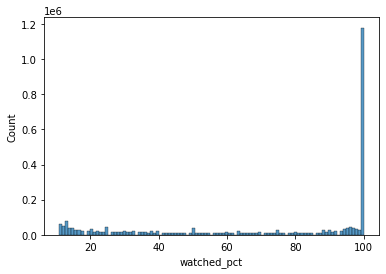

In [107]:
# Посмотрим, как распределен процент просмотров
sns.histplot(df_rating.watched_pct)

In [111]:
# Все в основном досматривают или выключают в начале, потому что не понравилось. 
# Введем неявную оценку: +1 если досмотрел (более 90%) и -1, если не досмотрел (менее 90%)
df_rating['rating'] = 1
df_rating.loc[df_rating[df_rating.watched_pct < 90].index, 'rating'] = -1

C:\Users\trybi\anaconda3\envs\IndexHockey\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\trybi\anaconda3\envs\IndexHockey\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [113]:
# Оставим только user_id, item_id и rating
df_rating = df_rating[['user_id', 'item_id', 'rating']]

### Разобъем на отдельно сериалы и отдельно фильмы. 

In [131]:
films_bd = df_items.query('content_type == "film"')

In [132]:
films_bd = films_bd[['item_id', 'title', 'release_year', 'genres', 'countries', 'age_rating', 'directors']]

In [133]:
films_interactions = df_rating[df_rating.item_id.isin(films_bd.item_id)]

In [134]:
films_bd['item_id'] = 'f' + films_bd['item_id'].astype(str)

In [135]:
films_bd

,item_id,title,release_year,genres,countries,age_rating,directors
1,f2508,Голые перцы,2014.0,"зарубежные, приключения, комедии",США,16.0,Скот Армстронг
7,f11114,Принцесса Лебедь: Пират или принцесса,2016.0,"для детей, сказки, полнометражные, зарубежные,...",США,6.0,Ричард Рич
8,f9853,Лабиринты прошлого,2018.0,"криминал, детективы, драмы, зарубежные, триллеры",Испания,16.0,Асгар Фархади
10,f3526,Код «Красный»,2018.0,"биография, экранизации, драмы, зарубежные, мел...",Великобритания,18.0,Тревор Нанн
15,f15076,Бладфест,2018.0,"зарубежные, ужасы, комедии",США,18.0,Оуэн Эгертон
...,...,...,...,...,...,...,...
15938,f3134,Держи удар,2018.0,"драмы, спорт",Нидерланды,12.0,Йохан Тиммерс
15939,f15699,100 дней на жизнь,2019.0,триллеры,США,16.0,Равин Ганди
15940,f1922,Цзюй Доу,1990.0,"драмы, мелодрамы",Китай,12.0,Чжан Имоу
15941,f11289,"Чёрный, чёрный человек",2019.0,"драмы, криминал",Россия,18.0,Адильхан Ержанов


In [136]:
films_interactions['item_id'] = 'f' + films_interactions['item_id'].astype(str)

C:\Users\trybi\anaconda3\envs\IndexHockey\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
films_interactions

,user_id,item_id,rating
0,176549,f9506,-1
1,699317,f1659,1
5,1032142,f6686,1
6,1016458,f354,-1
7,884009,f693,-1
...,...,...,...
5476242,268216,f3071,1
5476244,438585,f7829,1
5476247,546862,f9673,-1
5476249,384202,f16197,1


In [138]:
series_bd = df_items.query('content_type == "series"')

In [139]:
series_bd = series_bd[['item_id', 'title', 'release_year', 'genres', 'countries', 'age_rating', 'directors']]

In [140]:
series_interactions = df_rating[df_rating.item_id.isin(series_bd.item_id)]

In [141]:
series_bd['item_id'] = 's' + series_bd['item_id'].astype(str)

In [142]:
series_bd

,item_id,title,release_year,genres,countries,age_rating,directors
77,s4045,Босс,2011.0,драмы,США,18.0,"Джим МакКэй, Жан Де Сегонзак, Марио Ван Пиблз"
78,s2662,Пакт,2021.0,"драмы, детективы",Великобритания,18.0,"Ребекка Джонсон, Эрик Стайлз"
88,s10519,Кто поймал букет невесты,2021.0,"русские, детективы",Россия,16.0,Карен Захаров
97,s16172,Лишняя кожа,2018.0,научно-популярные,США,16.0,NaN
98,s2074,Посредник,1990.0,"боевики, фантастика",Россия,16.0,В.Потапов
...,...,...,...,...,...,...,...
15957,s15610,Цена любви,2015.0,мелодрамы,Россия,16.0,А. Хван
15958,s6443,Полярный круг,2018.0,"драмы, триллеры, криминал","Финляндия, Германия",16.0,Ханну Салонен
15959,s2367,Надежда,2020.0,"драмы, боевики",Россия,18.0,Елена Хазанова
15960,s10632,Сговор,2017.0,"драмы, триллеры, криминал",Россия,18.0,"Эшреф Рейбрук, Амир Камдин, Эрик Эгер"


In [143]:
series_interactions['item_id'] = 's' + series_interactions['item_id'].astype(str)

C:\Users\trybi\anaconda3\envs\IndexHockey\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
series_interactions

,user_id,item_id,rating
3,864613,s7638,1
15,15607,s3043,1
28,81786,s2616,1
49,474544,s10440,1
74,810825,s4223,1
...,...,...,...
5476164,13243,s2657,-1
5476173,565181,s15297,-1
5476195,616080,s15297,-1
5476209,337043,s9689,1


In [145]:
data_path = Path('../data')

In [146]:
# Запишем данные о интеракциях и БД
films_bd.to_parquet(data_path/ 'films_bd.parquet')
films_interactions.to_parquet(data_path/ 'films_interactions.parquet')

series_bd.to_parquet(data_path/ 'series_bd.parquet')
series_interactions.to_parquet(data_path/ 'series_interactions.parquet')